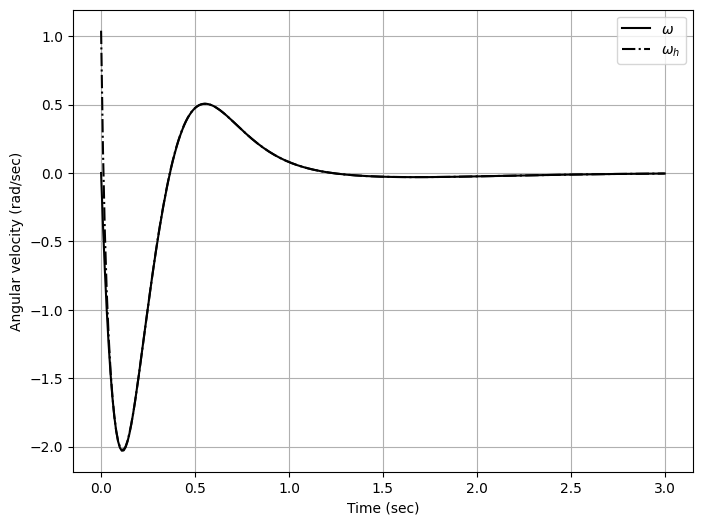

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def inverted_pendulum_luenberger(t, X):
    # State variable x = [x; v; theta; omega]
    x = X[:4]
    psi = X[4]

    # Constants
    g = 9.8
    l = 1
    m = 1
    M = 1

    d1 = M + m * (1 - np.cos(x[2])**2)
    d2 = l * d1
    k = np.array([-40.0000, -37.3693, -190.6669, -54.7283])

    dpsi = -40.0 * x[0] - 37.37 * x[1] - 405.9 * x[2] - 58.73 * psi
    omega_h = psi + 4 * x[2]
    xh = np.array([x[0], x[1], x[2], omega_h])
    F = -k @ x  # State feedback
    # F = -k @ xh  # Uncomment for Luenberger Observer Feedback

    xp = np.array([
        x[1],
        (F + m * l * x[3]**2 * np.sin(x[2]) - m * g * np.sin(x[2]) * np.cos(x[2])) / d1,
        x[3],
        (-F * np.cos(x[2]) - m * l * x[3]**2 * np.sin(x[2]) * np.cos(x[2]) + (M + m) * g * np.sin(x[2])) / d2
    ])
    return np.concatenate((xp, [dpsi]))


    # Define initial conditions and parameters
X0 = np.array([0, 0, 0.26, 0, 0])  # Initial state vector

# Define the time span for the simulation
t_span = (0, 3)
t_eval = np.linspace(t_span[0], t_span[1], 300)

# Solve the differential equations
sol = solve_ivp(inverted_pendulum_luenberger, t_span, X0, t_eval=t_eval, max_step=1e-2)

t = sol.t
x = sol.y.T

psi = x[:, 4]
omega = x[:, 3]
omega_h = psi + 4 * x[:, 2]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, omega, 'k', label=r'$\omega$')
plt.plot(t, omega_h, '-.k', label=r'$\omega_h$')
plt.grid()
plt.xlabel('Time (sec)')
plt.ylabel('Angular velocity (rad/sec)')
plt.legend()

plt.show()

